SURESH KANNA P
18MIS1067
SWE4012
MACHINE LEARNING LAB-5


Import the required packages and define the dataset

In [13]:
#import the required packages

import numpy as np
import pandas as pd

#‘eps’ here is the smallest representable number. At times we get log(0) or 0 in the denominator, to avoid that we are going to use this.

eps = np.finfo(float).eps
from numpy import log2 as log
import pprint

#define the datasets

outlook = 'overcast,overcast,overcast,overcast,rainy,rainy,rainy,rainy,rainy,sunny,sunny,sunny,sunny,sunny'.split(',')
temp = 'hot,cool,mild,hot,mild,cool,cool,mild,mild,hot,hot,mild,cool,mild'.split(',')
humidity = 'high,normal,high,normal,high,normal,normal,normal,high,high,high,high,normal,normal'.split(',')
windy = 'FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE'.split(',')
play = 'yes,yes,yes,yes,yes,yes,no,yes,no,no,no,no,yes,yes'.split(',')

#creating the pandas dataframe
dataset ={'outlook':outlook,'temp':temp,'humidity':humidity,'windy':windy,'play':play}
df = pd.DataFrame(dataset,columns=['outlook','temp','humidity','windy','play'])

In [14]:
df

,outlook,temp,humidity,windy,play
0,overcast,hot,high,FALSE,yes
1,overcast,cool,normal,TRUE,yes
2,overcast,mild,high,TRUE,yes
3,overcast,hot,normal,FALSE,yes
4,rainy,mild,high,FALSE,yes
5,rainy,cool,normal,FALSE,yes
6,rainy,cool,normal,TRUE,no
7,rainy,mild,normal,FALSE,yes
8,rainy,mild,high,TRUE,no
9,sunny,hot,high,FALSE,no


1. Compute the entropy for data-set
2. For every attribute/feature:
       1.Calculate entropy for all categorical values
       2.Take average information entropy for the current attribute
       3.Calculate gain for the current attribute
3. Pick the highest gain attribute.

4. Repeat until we get the tree we desired

Find the Entropy and then Information Gain for splitting the data set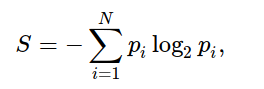


In [15]:

#1. claculate entropy to the entire dataset
def info(df):
    Class = df.keys()[-1]   
    infD = 0
    values = df[Class].unique()
    for value in values:
        prob = df[Class].value_counts()[value]/len(df[Class])
        infD += -prob*np.log2(prob)
    return infD

 Then define a function {ent} to calculate entropy of each attributes 


In [16]:
def info_attribute(df,attribute):
  Class = df.keys()[-1]  
  Class_values = df[Class].unique()  
  att_values = df[attribute].unique()    
  info0 = 0
  for att_value in att_values:
      info = 0
      for Class_value in Class_values:
          num = len(df[attribute][df[attribute]==att_value][df[Class] ==Class_value])
          den = len(df[attribute][df[attribute]==att_value])
          prob = num/(den+eps)
          info += -prob*log(prob+eps)
      prob0 = den/len(df)
      info0 += -prob0*info
  return abs(info0)

 Then define a function to find the nodes of the tree


In [17]:
def find_node(df):
    info_gain = []
    for key in df.keys()[:-1]:
        info_gain.append(info(df)-info_attribute(df,key))
    return df.keys()[:-1][np.argmax(info_gain)]

In [18]:
def get_subtable(df, node,value):
  return df[df[node] == value].reset_index(drop=True)

 Then define a function to build the tree


In [19]:
def buildTree(df,tree=None): 
    Class = df.keys()[-1]  
    
     #Get attribute with maximum information gain
    node = find_node(df)
    #Get distinct value of that attribute
    attValue = np.unique(df[node])
     #Create an empty dictionary to create the tree   
    if tree is None:                    
        tree={}
        tree[node] = {}
 #We make loop to construct a tree by calling this function recursively. 
    for value in attValue:
        
        subtable = get_subtable(df,node,value)
        class_value,counts = np.unique(subtable['play'],return_counts=True)                        
        
        if len(counts)==1:
            tree[node][value] = class_value[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable) 
                   
    return tree

Call and print the function


In [20]:
tree = buildTree(df)
pprint.pprint(tree)

{'outlook': {'overcast': 'yes',
             'rainy': {'windy': {'FALSE': 'yes', 'TRUE': 'no'}},
             'sunny': {'humidity': {'high': 'no', 'normal': 'yes'}}}}
